# Public Health Risk: From Vitals To Intervention - Caden Luu (11/23/25)

Use anonymized, real-world patient records to understand patient health risk levels. The goal is to create a tool that allows for early clinical intervention and better resource allocation in clinical settings, all while practicing data science on healthcare data without exposing personal patient information.
- **Description:** An anonymized dataset of 1,000 real-world patient records with vital signs, licensed under Apache 2.0.
- **Key Features:**
- Vital signs such as respiratory rate, oxygen saturation, systolic blood pressure, heart rate, and a categorical oxygen therapy scale.

In [86]:
import warnings
warnings.filterwarnings('ignore')

## Import libraries and data

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import data

In [88]:
df = pd.read_csv('Health_Risk_Dataset.csv')
df.head()

,Patient_ID,Respiratory_Rate,Oxygen_Saturation,O2_Scale,Systolic_BP,Heart_Rate,Temperature,Consciousness,On_Oxygen,Risk_Level
0,P0522,25,96,1,97,107,37.5,A,0,Medium
1,P0738,28,92,2,116,151,38.5,P,1,High
2,P0741,29,91,1,79,135,38.4,A,0,High
3,P0661,24,96,1,95,92,37.3,A,0,Medium
4,P0412,20,96,1,97,97,37.4,A,0,Low


## Data Preprocessing

### Check for Missing Values

In [89]:
df.isnull().sum()

Patient_ID           0
Respiratory_Rate     0
Oxygen_Saturation    0
O2_Scale             0
Systolic_BP          0
Heart_Rate           0
Temperature          0
Consciousness        0
On_Oxygen            0
Risk_Level           0
dtype: int64

### Check for duplicates

In [90]:
sum(df.duplicated())

0

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Patient_ID         1000 non-null   object 
 1   Respiratory_Rate   1000 non-null   int64  
 2   Oxygen_Saturation  1000 non-null   int64  
 3   O2_Scale           1000 non-null   int64  
 4   Systolic_BP        1000 non-null   int64  
 5   Heart_Rate         1000 non-null   int64  
 6   Temperature        1000 non-null   float64
 7   Consciousness      1000 non-null   object 
 8   On_Oxygen          1000 non-null   int64  
 9   Risk_Level         1000 non-null   object 
dtypes: float64(1), int64(6), object(3)
memory usage: 78.3+ KB


In [92]:
df.describe()

,Respiratory_Rate,Oxygen_Saturation,O2_Scale,Systolic_BP,Heart_Rate,Temperature,On_Oxygen
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,21.511000,92.59000,1.124000,106.160000,98.460000,37.921000,0.274000
std,5.287517,4.47302,0.329746,17.897562,19.694626,1.113696,0.446232
min,12.000000,74.00000,1.000000,50.000000,60.000000,35.600000,0.000000
25%,17.000000,90.00000,1.000000,94.000000,84.000000,37.100000,0.000000
50%,20.000000,94.00000,1.000000,109.000000,95.500000,37.800000,0.000000
75%,25.000000,96.00000,1.000000,119.000000,109.000000,38.600000,1.000000
max,40.000000,100.00000,2.000000,146.000000,163.000000,41.800000,1.000000


In [93]:
# Drop Patient_ID Column
df = df.drop(columns = ['Patient_ID'])

## Exploratory Data Analysis

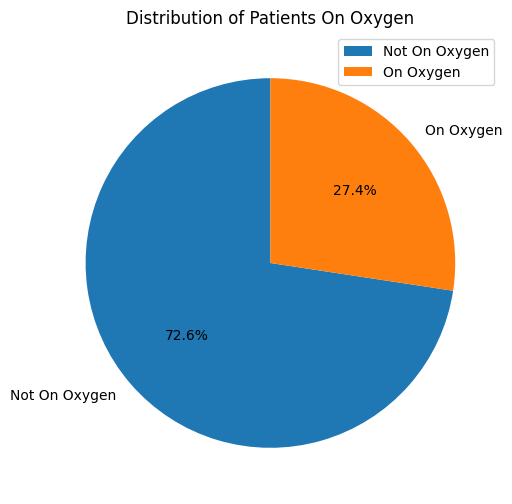

In [94]:
plt.figure(figsize=(8,6))
plt.pie(df['On_Oxygen'].value_counts(), 
        labels = ['Not On Oxygen', 'On Oxygen'],
        autopct = '%1.1f%%',
        startangle = 90
        )
plt.title('Distribution of Patients On Oxygen')
plt.legend()
plt.show()

<Axes: xlabel='Respiratory_Rate', ylabel='Temperature'>

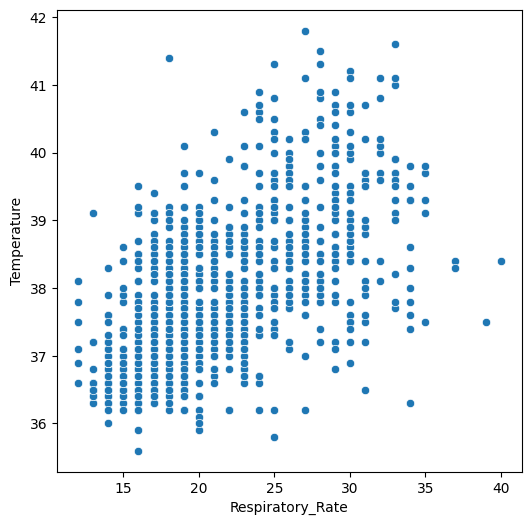

In [95]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='Respiratory_Rate', y='Temperature', data = df)

<Axes: xlabel='Heart_Rate', ylabel='Respiratory_Rate'>

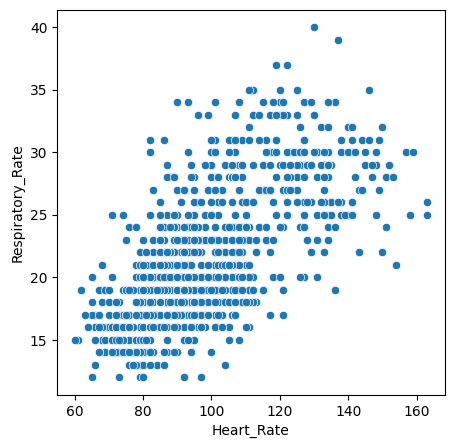

In [96]:
plt.figure(figsize = (5,5))
sns.scatterplot(x = 'Heart_Rate', y = 'Respiratory_Rate', data = df)

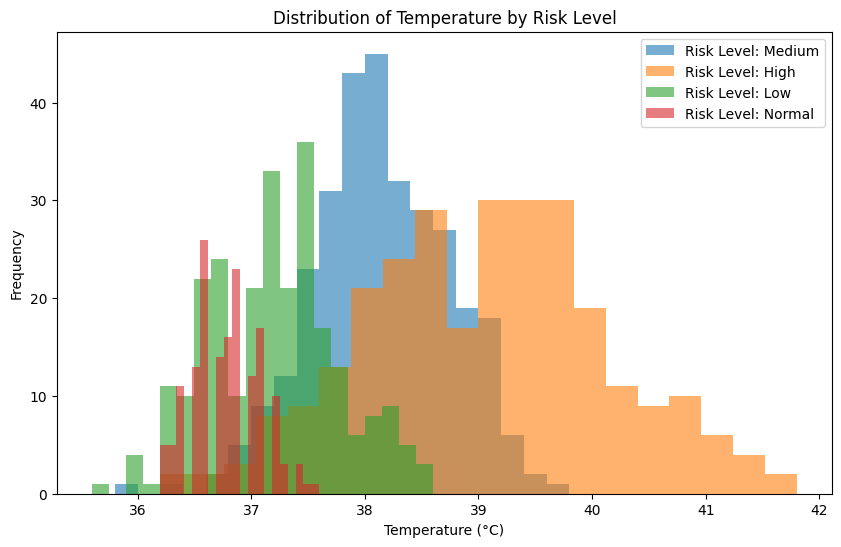

In [97]:
plt.figure(figsize=(10,6))

for risk in df['Risk_Level'].unique():
    subset = df[df['Risk_Level'] == risk]
    plt.hist(subset['Temperature'], alpha=0.6, label = f'Risk Level: {risk}', bins = 20)

plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.title("Distribution of Temperature by Risk Level")
plt.legend()
plt.show()

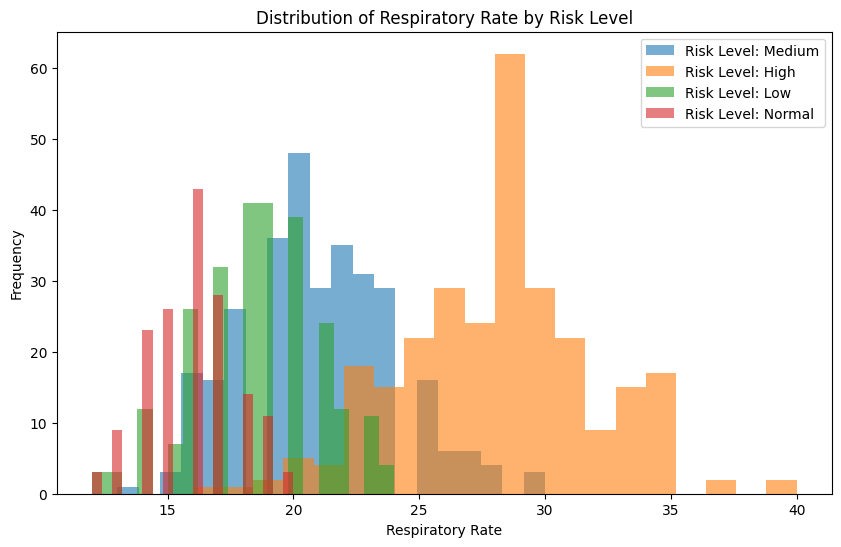

In [98]:
plt.figure(figsize=(10,6))

for risk in df['Risk_Level'].unique():
    subset = df[df['Risk_Level'] == risk]
    plt.hist(subset['Respiratory_Rate'], alpha=0.6, label = f'Risk Level: {risk}', bins = 20)

plt.xlabel('Respiratory Rate')
plt.ylabel('Frequency')
plt.title("Distribution of Respiratory Rate by Risk Level")
plt.legend()
plt.show()

<Axes: >

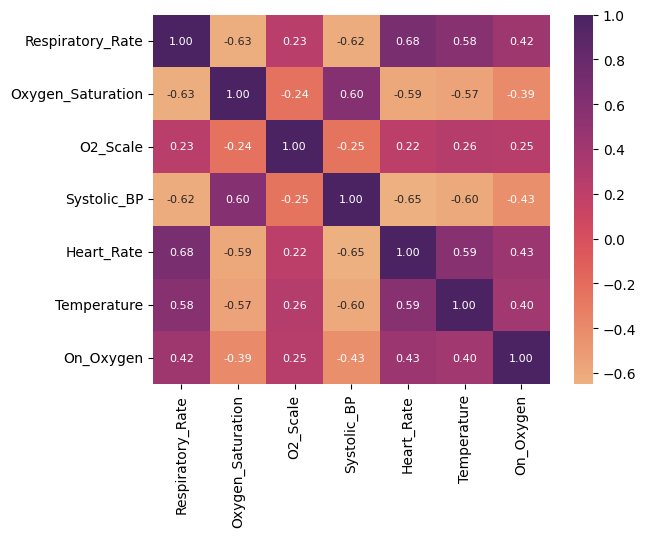

In [99]:
numeric_df = df.select_dtypes(include = 'number')
sns.heatmap(numeric_df.corr(),
            annot = True,
            annot_kws = {'fontsize': 8},
            cmap = 'flare',
            fmt = '.2f')

### What Exploratory Data Analysis Tells Us

## Splitting Data Into Training and Testing Sets

In [100]:
X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values

In [101]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

### One Hot Encoding

In [102]:
df = pd.get_dummies(df, columns = ['Consciousness', 'On_Oxygen'])

### Feature Scaling

In [103]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_fs = X_train.copy()
X_test_fs = X_test.copy()

X_train_fs[:, :5] = sc.fit_transform(X_train_fs[:, :5])
X_test_fs[:, :5] = sc.fit_transform(X_test_fs[:, :5])